In [22]:
c
plt.rcParams['figure.dpi'] = 100

# machine learning
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

In [35]:
train_data=pd.read_csv('../data/train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
train_data['Fare'].mean()

32.204207968574636

In [24]:
X=train_data.iloc[:,:-1]
y=train_data.iloc[:,-1]

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.25, 
                                               random_state=42,
                                               shuffle=True)
print(f"X train shape: {X_train.shape}")
print(f"y train shape: {y_train.shape}")

print(f"X test shape : {X_test.shape}")
print(f"y test shape : {y_test.shape}")

X train shape: (668, 7)
y train shape: (668,)
X test shape : (223, 7)
y test shape : (223,)


Feature Importances :  [0.25521997 0.5290027  0.03869193 0.0681866  0.03319018 0.03596237
 0.03974621]


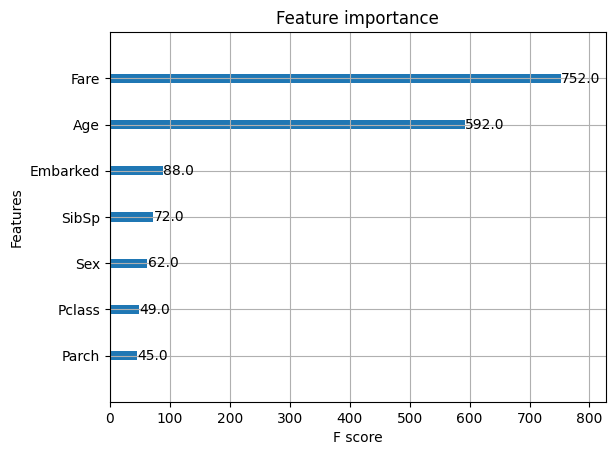

In [31]:

from xgboost import XGBClassifier
from xgboost import plot_importance

# fit model to training data
xgb_model = XGBClassifier(random_state = 0 )
xgb_model.fit(X_train, y_train)

print("Feature Importances : ", xgb_model.feature_importances_)

# plot feature importance
plot_importance(xgb_model)
plt.show()

In [32]:
y_pred=xgb_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7892376681614349

Feature Importances :  [0.24993284 0.5667736  0.04034046 0.06522427 0.03832311 0.03940567]


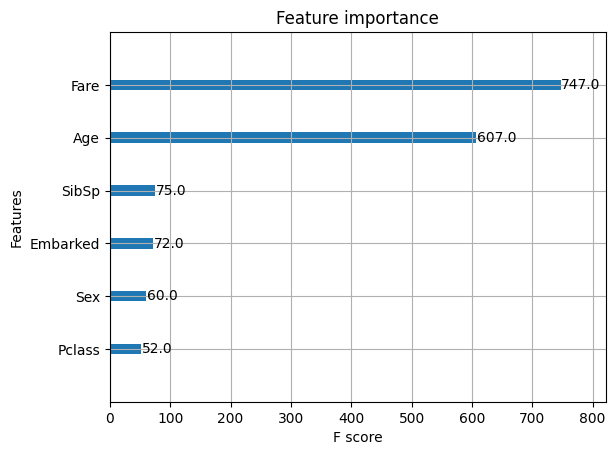

In [33]:
X_train=X_train.drop(['Parch'],axis=1)
X_test=X_test.drop(['Parch'],axis=1)
# fit model to training data
xgb_model = XGBClassifier(random_state = 0 )
xgb_model.fit(X_train, y_train)

print("Feature Importances : ", xgb_model.feature_importances_)

# plot feature importance
plot_importance(xgb_model)
plt.show()

In [34]:
y_pred=xgb_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7802690582959642

In [2]:
train_data=pd.read_csv('../data/train.csv')
test_data=pd.read_csv('../data/test.csv')
print(f"Train data: {train_data.shape}")
print(f"Test data: {test_data.shape}")

Train data: (891, 12)
Test data: (418, 11)


In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(train_data['Sex'])
pclass_le=le.transform(train_data['Sex'])

In [8]:
train_data['Sex']=le.transform(train_data['Sex'])
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [5]:
pclass_le

array([2, 0, 2, 0, 2, 2, 0, 2, 2, 1, 2, 0, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1,
       2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 1, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 0, 1, 2, 1, 2, 2, 0, 0, 2, 0, 2,
       1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 1, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 0, 0, 2, 0, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 0, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2,
       2, 0, 1, 2, 2, 1, 2, 1, 2, 0, 2, 0, 2, 2, 1, 1, 2, 1, 0, 0, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 0, 2, 1, 0, 1,
       2, 1, 2, 2, 0, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2,
       1, 2, 2, 0, 2, 1, 0, 1, 2, 2, 0, 2, 2, 2, 0, 0, 0, 1, 2, 2, 0, 0,
       2, 1, 2, 2, 0, 0, 0, 2, 1, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 1, 2, 0, 0, 1, 2, 2, 0, 2, 0, 0, 0, 2,

In [13]:
train_data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [ ]:
# drop
    # PassengerId
    # Ticket
    # Name  

# missing value treatment - save mean of train
    # Pclass=unknown
    # Sex=unknown
    # Age=mean of train
    # Cabin=unknown
    # Embarked=unknown
    

# ohe/label encoder for linear models and tree models respectively - save the ohe objects to pickle
    # Pclass
    # Sex 
    # SibSp
    # Parch


# standard scaling 
    # Age 
    # Fare

In [18]:
from sklearn import preprocessing

ohe=preprocessing.OneHotEncoder()
ohe.fit(train_data[['Pclass']])
transformed = ohe.transform(train_data[['Pclass']])
print(transformed.toarray())

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [19]:
print(ohe.categories_)

[array([1, 2, 3])]


In [20]:
transformed.toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [8]:
train_data[ohe.categories_[0]] = transformed.toarray()
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0,1.0


In [42]:
ohe=pd.get_dummies(sex)
train_df=pd.concat([train_data,ohe],axis=1)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [26]:
train_data['Pclass'] = 'Pclass_' + train_data['Pclass'].astype(str)

In [27]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,Pclass_Pclass3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,Pclass_Pclass1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,Pclass_Pclass3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,Pclass_Pclass1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,Pclass_Pclass3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
from sklearn import preprocessing

scaler=preprocessing.StandardScaler()
scaler.fit(train_data[['Age']])
age_transformed=scaler.transform(train_data[['Age']])
train_data['Age']=age_transformed
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,Pclass_Pclass3,"Braund, Mr. Owen Harris",male,-0.530377,1,0,A/5 21171,7.2500,NaN,S
1,2,1,Pclass_Pclass1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.571831,1,0,PC 17599,71.2833,C85,C
2,3,1,Pclass_Pclass3,"Heikkinen, Miss. Laina",female,-0.254825,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,Pclass_Pclass1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.365167,1,0,113803,53.1000,C123,S
4,5,0,Pclass_Pclass3,"Allen, Mr. William Henry",male,0.365167,0,0,373450,8.0500,NaN,S


### Data Preprocessing

In [5]:
def data_preprocessor(mean_age,mode_embarked,mean_Fare,df):
    # impute missing values
    df['Age']=df['Age'].fillna(value=mean_age)    
    df['Embarked']=df['Embarked'].fillna(value=mode_embarked[0])    
    df['Fare']=df['Fare'].fillna(value=mean_Fare)
    # encoding
    df['Sex'] = df['Sex'].replace('male', 1)
    df['Sex'] = df['Sex'].replace('female', 0)
    df['Embarked'] = df['Embarked'].replace('C', 0)
    df['Embarked'] = df['Embarked'].replace('S', 1)
    df['Embarked'] = df['Embarked'].replace('Q', 2)
    df['Fare']=round(df['Fare'],2)    
    return df

mean_age=round(train_data.Age.mean(),2)
mode_embarked=train_data['Embarked'].mode()
mean_Fare=train_data['Fare'].mean()

train_df_clean=data_preprocessor(mean_age,mode_embarked,mean_Fare,train_data)
test_df_clean=data_preprocessor(mean_age,mode_embarked,mean_Fare,test_data)

# drop columns
drop_columns=['Name','PassengerId','Cabin','Ticket']
train_df_clean=train_df_clean.drop(drop_columns,axis=1)

drop_columns=['Name','Cabin','Ticket']
test_df_clean=test_df_clean.drop(drop_columns,axis=1)

In [6]:
# # Standard scaler - Age, Fare
# col_names = ['Age', 'Fare']
# train_features = train_df_clean[col_names]
# test_features = test_df_clean[col_names]

# scaler = StandardScaler().fit(train_features.values)
# train_features_scaled = scaler.transform(train_features.values)
# test_features_scaled = scaler.transform(test_features.values)

# train_df_clean[col_names] = train_features_scaled
# test_df_clean[col_names] = test_features_scaled

In [7]:
# Binning - Age, Fare
def age_binning(df):
    df.loc[ df['Age'] <= 16, 'Age'] = 0
    df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
    df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
    df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
    df.loc[df['Age'] > 64, 'Age']
    df['Age'] = df['Age'].astype(int)
    return df

def fare_binning(df):
    df.loc[df['Fare'] <= 7.91, 'Fare'] = 0
    df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare'] = 1
    df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31), 'Fare']   = 2
    df.loc[df['Fare'] > 31, 'Fare'] = 3
    df['Fare'] = df['Fare'].astype(int)
    return df

# binning the age feature
train_df_clean=age_binning(train_df_clean)
test_df_clean=age_binning(test_df_clean)

# binning the fare feature
train_df_clean=fare_binning(train_df_clean)
test_df_clean=fare_binning(test_df_clean)

In [8]:
train_df_clean['Family_size']=train_df_clean['Parch']+train_df_clean['SibSp']+1
test_df_clean['Family_size']=test_df_clean['Parch']+test_df_clean['SibSp']+1

train_df_clean['Is_alone']=0
train_df_clean.loc[train_df_clean['Family_size']==1,'Is_alone']=1

test_df_clean['Is_alone']=0
test_df_clean.loc[test_df_clean['Family_size']==1,'Is_alone']=1

surv=train_df_clean.pop('Survived')
train_df_clean['Survived']=surv
train_df_clean.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size,Is_alone,Survived
0,3,1,1,1,0,0,1,2,0,0
1,1,0,2,1,0,3,0,2,0,1
2,3,0,1,0,0,1,1,1,1,1
3,1,0,2,1,0,3,1,2,0,1
4,3,1,2,0,0,1,1,1,1,0


In [9]:
test_df_clean.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size,Is_alone
0,892,3,1,2,0,0,0,2,1,1
1,893,3,0,2,1,0,0,1,2,0
2,894,2,1,3,0,0,1,2,1,1
3,895,3,1,1,0,0,1,1,1,1
4,896,3,0,1,1,1,1,1,3,0


In [10]:
train_df_clean.to_csv("train_clean.csv",index=False)
test_df_clean.to_csv("test_clean.csv",index=False)

In [11]:
train_df=pd.read_csv('./train_clean.csv')
test_df=pd.read_csv('./test_clean.csv')
y=train_df.pop("Survived").to_numpy()
X=train_df.to_numpy()
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (891, 9)
y shape: (891,)


In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.25, 
                                               random_state=42,
                                               shuffle=True)
print(f"X train shape: {X_train.shape}")
print(f"y train shape: {y_train.shape}")

print(f"X test shape : {X_test.shape}")
print(f"y test shape : {y_test.shape}")

X train shape: (668, 9)
y train shape: (668,)
X test shape : (223, 9)
y test shape : (223,)


In [13]:
# # save model
# joblib.dump(gs, 'titanic_model.pkl')

In [14]:
# # load test data
# test_data=pd.read_csv('test_clean.csv')
# test_data.head()

In [15]:
# # Load model
# xgb_model=joblib.load("./titanic_model.pkl")
# result=pd.DataFrame()
# result['PassengerId']=test_data.pop('PassengerId')

# # inference
# y_pred=xgb_model.predict(test_data)
# result['Survived']=pd.Series(y_pred)
# result=result.sort_values(by='PassengerId')

In [16]:
# result.to_csv('submission.csv',index=False)
# result.head()